# Pymaceuticals Inc.
---

### Analysis

In this project, I analyzed data from two sources: Mouse_metadata.csv and Study_results.csv. After cleaning and preparing the data, I created various visualizations, including bar charts, pie charts, box plots, line plots, and a scatter plot with a regression line. These visualizations led to key conclusions: Infubinol and Ceftamin had the highest median final tumor volumes, at least 1.5 times greater than those of Capomulin and Ramicane. Additionally, there was a strong correlation between average tumor volume and mouse weight in the Capomulin regimen; as weight increased, the average tumor volume also rose steadily.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique()) 

249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_mid_tp = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_id = unique_mid_tp["Mouse ID"].unique()
unique_id

array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID.
merged_df[merged_df["Mouse ID"] == unique_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = merged_df[merged_df["Mouse ID"] != unique_id[0]]
clean_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_df["Mouse ID"].unique()) 

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_df = clean_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

grouped_df = pd.DataFrame({
    'Mean Tumor Volume': grouped_df.mean(),
    'Median Tumor Volume': grouped_df.median(),
    'Tumor Volume Variance': grouped_df.var(),
    'Tumor Volume Std. Dev.': grouped_df.std(),
    'Tumor Volume Std. Err.': grouped_df.apply(st.sem)

})
grouped_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#** unpacks a dictionary | so **{'Mean Tumor Volume': 'mean'} == Mean Tumor Volume='mean'
grouped_df = clean_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    **{'Mean Tumor Volume': 'mean'},
    **{'Median Tumor Volume': 'median'},
    **{'Tumor Volume Variance': 'var'},
    **{'Tumor Volume Std. Dev.': 'std'},
    **{'Tumor Volume Std. Err.': 'sem'},
)
grouped_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

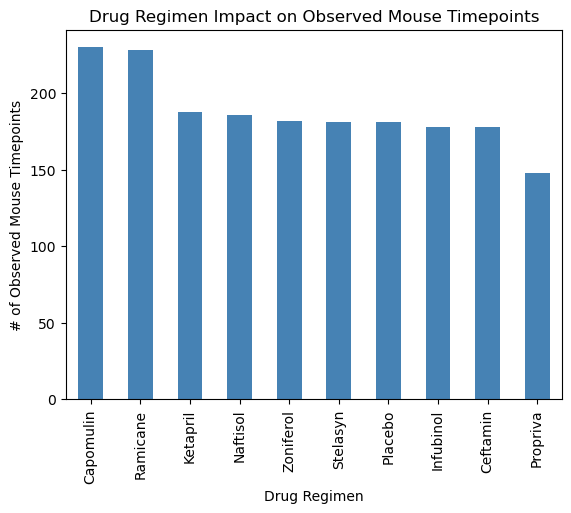

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_plot = clean_merged_df['Drug Regimen'].value_counts().plot(kind="bar", color="steelblue")
pandas_plot.set_title("Drug Regimen Impact on Observed Mouse Timepoints")
pandas_plot.set_ylabel("# of Observed Mouse Timepoints");

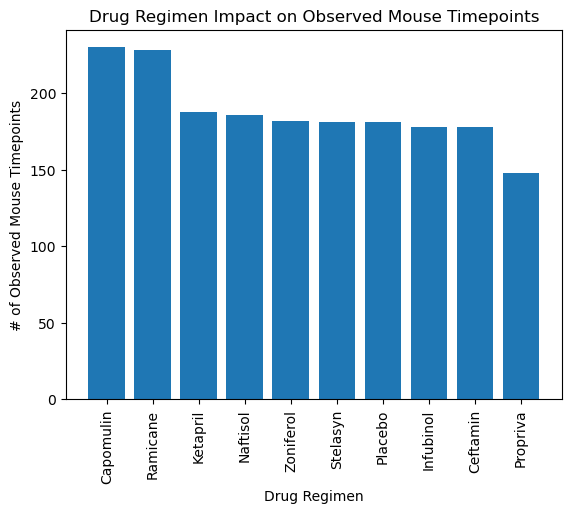

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugreg_valcounts = clean_merged_df['Drug Regimen'].value_counts()
plt.bar(drugreg_valcounts.index, drugreg_valcounts.values)
plt.title("Drug Regimen Impact on Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)


plt.show()

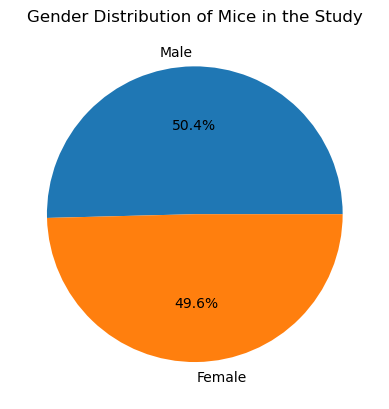

In [48]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_valuecounts = clean_merged_df.drop_duplicates(subset='Mouse ID').groupby('Sex').size().sort_values(ascending=False)

# Make the pie chart
sex_chart = sex_valuecounts.plot(kind="pie",autopct='%1.1f%%')
sex_chart.set_title("Gender Distribution of Mice in the Study");

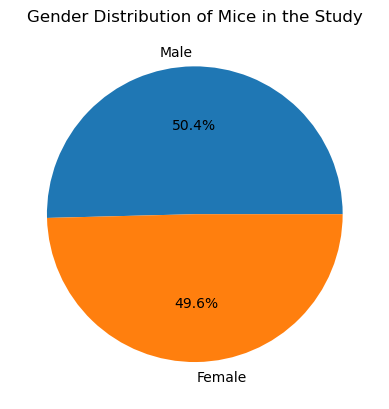

In [49]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_valuecounts = clean_merged_df.drop_duplicates(subset='Mouse ID').groupby('Sex').size().sort_values(ascending=False)

# Make the pie chart
plt.pie(sex_valuecounts, labels=sex_valuecounts.index, autopct='%1.1f%%')
plt.title("Gender Distribution of Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_merged_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_merged_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how="right")

In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_df = merged_df[merged_df['Drug Regimen'] == treatment]
    tumor_vol.append(treatment_df)
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    # add subset
    lower_quartile = tumor_volumes.quantile(0.25)
    upper_quartile = tumor_volumes.quantile(0.75)
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s iqr={round(iqr,2)}, and potential outliers: {outliers}")




Capomulin's iqr=7.78, and potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's iqr=9.1, and potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's iqr=11.48, and potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's iqr=15.58, and potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


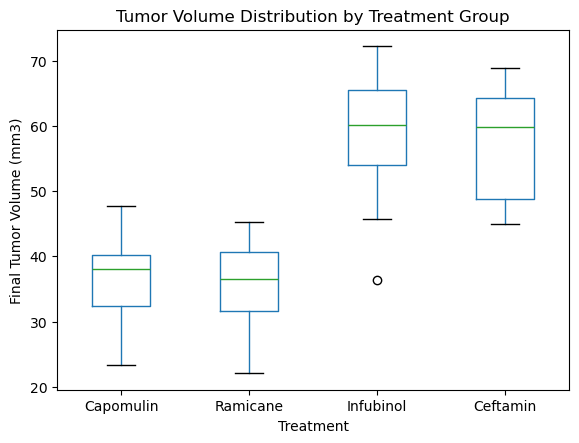

In [52]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data = []

for list in tumor_vol:
    list = list[["Drug Regimen","Tumor Volume (mm3)"]].reset_index(drop=True)
    data.append(list)
df = pd.concat(data)
#change order to example
df['Drug Regimen'] = pd.Categorical(df['Drug Regimen'], categories=treatments, ordered=True)
boxplot = df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)
boxplot.set_xlabel('Treatment')
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_title('Tumor Volume Distribution by Treatment Group')
plt.suptitle('')

# Show the plot
plt.show()





## Line and Scatter Plots

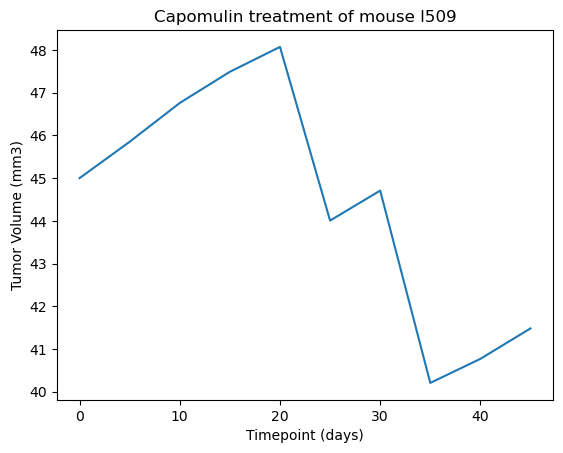

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_data = clean_merged_df[(clean_merged_df["Mouse ID"] == "l509")]
line_data = line_data[["Tumor Volume (mm3)","Timepoint"]].set_index("Timepoint")
line_data.plot(kind="line",legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

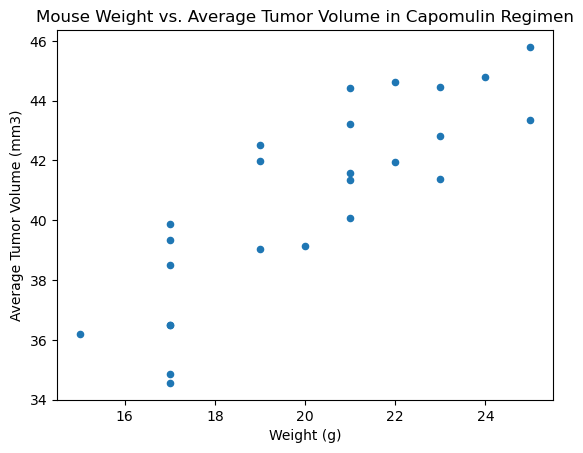

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = clean_merged_df[(clean_merged_df["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
})


scatter_data.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume in Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


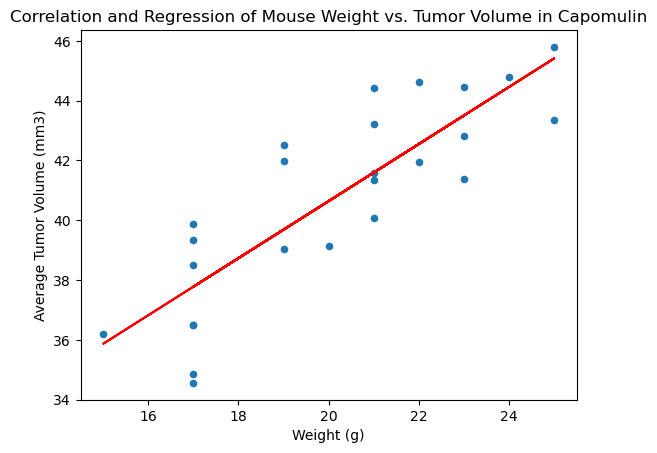

In [55]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = scatter_data["Weight (g)"].corr(scatter_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")
slope, intercept, r_value, p_value, std_err = st.linregress(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
regression_values = scatter_data["Weight (g)"] * slope + intercept


scatter_data.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(scatter_data["Weight (g)"], regression_values, color="red", label="Regression line")
plt.title("Correlation and Regression of Mouse Weight vs. Tumor Volume in Capomulin")
plt.show()